In [1]:
import pandas as pd
import seaborn as sns
from datetime import datetime
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv(
    # "../data/SG-ES.csv", 
    "../../../Downloads/SG-SP.csv", 
    parse_dates=["dataNotificacao", "dataEncerramento"], 
    encoding="utf-8", 
    sep=";"
)

df

/tmp/ipykernel_6210/3702339617.py:1: DtypeWarning: Columns (12,21,23,31,33,34,36,37,57,62) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(


,sintomas,profissionalSaude,racaCor,outrosSintomas,outrasCondicoes,profissionalSeguranca,cbo,condicoes,sexo,estado,...,codigoResultadoTeste3,codigoEstadoTeste4,codigoTipoTeste4,codigoFabricanteTeste4,codigoResultadoTeste4,dataColetaTeste1,dataColetaTeste2,dataColetaTeste3,dataColetaTeste4,idade
0,"Tosse, Dor de Garganta",Não,Ignorado,NaN,NaN,Não,NaN,NaN,Masculino,São Paulo,...,NaN,NaN,NaN,NaN,NaN,2022-07-02,NaN,NaN,NaN,50.0
1,"Distúrbios Olfativos, Tosse, Dor de Garganta, ...",Não,Ignorado,NaN,NaN,Não,NaN,NaN,Feminino,São Paulo,...,NaN,NaN,NaN,NaN,NaN,2022-01-18,NaN,NaN,NaN,28.0
2,"Dor de Cabeça, Febre, Outros",Não,Branca,"tontura, vômito, diarréia",NaN,Não,NaN,Doenças cardíacas crônicas,Feminino,São Paulo,...,NaN,NaN,NaN,NaN,NaN,2022-10-07,NaN,NaN,NaN,40.0
3,"Coriza, Tosse",Não,Branca,NaN,NaN,Não,NaN,NaN,Masculino,São Paulo,...,NaN,NaN,NaN,NaN,NaN,2022-06-24,NaN,NaN,NaN,42.0
4,"Coriza, Tosse, Dor de Garganta, Outros",Não,Preta,Calafrios,NaN,Não,NaN,NaN,Feminino,São Paulo,...,NaN,NaN,NaN,NaN,NaN,2022-07-20,NaN,NaN,NaN,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2226518,"Coriza, Tosse, Febre",Não,Amarela,NaN,NaN,Não,NaN,NaN,Feminino,São Paulo,...,NaN,NaN,NaN,NaN,NaN,2022-05-26,2022-05-26,NaN,NaN,NaN
2226519,"Dor de Cabeça, Tosse, Dor de Garganta, Outros",Não,Branca,FADIGA,NaN,Não,NaN,NaN,Masculino,São Paulo,...,NaN,NaN,NaN,NaN,NaN,2022-08-24,NaN,NaN,NaN,NaN
2226520,"Dor de Cabeça, Tosse, Febre, Outros",Não,Branca,MIALGIA,NaN,Não,NaN,NaN,Feminino,São Paulo,...,NaN,NaN,NaN,NaN,NaN,2024-04-29,NaN,NaN,NaN,NaN
2226521,"Dor de Cabeça, Tosse, Febre, Coriza",Não,Branca,NaN,NaN,Não,NaN,NaN,Masculino,São Paulo,...,NaN,NaN,NaN,NaN,NaN,2022-01-19,NaN,NaN,NaN,38.0


In [3]:

date_range = pd.date_range(
    # start=df['dataInicioSintomas'].min(), Notificação ou início dos sintomas?
    start=df['dataNotificacao'].min(),
    end=df['dataEncerramento'].max(),
    freq='D'
)

sir = pd.DataFrame(
    index=date_range, 
    columns=['I', 'R'], 
    dtype='int'
)

In [4]:
df[df["dataEncerramento"].isnull()].shape[0]

1022715

In [5]:
# df = df.dropna(axis=0, subset=['dataEncerramento'])

In [6]:
pd.set_option('future.no_silent_downcasting', True)
sir = sir.fillna(0)

for i, row in df.iterrows():
    
    start = row['dataNotificacao']
    end = start + pd.Timedelta(days=7)
    # end = row['dataEncerramento']
    
    if pd.isna(end):  
        sir.loc[start:, 'I'] += 1
    else: 
        assert start <= end, f"Inconsistency at row {i}, start={start}, end={end}"
        sir.loc[start:end - pd.Timedelta(days=1), 'I'] += 1
        sir.loc[end:, 'R'] += 1


In [7]:
sir

,I,R
2020-01-01,1.0,0.0
2020-01-02,2.0,0.0
2020-01-03,3.0,0.0
2020-01-04,5.0,0.0
2020-01-05,10.0,0.0
...,...,...
2025-09-05,1.0,2226502.0
2025-09-06,1.0,2226502.0
2025-09-07,1.0,2226502.0
2025-09-08,0.0,2226503.0


In [8]:
sir.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2079 entries, 2020-01-01 to 2025-09-09
Freq: D
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   I       2079 non-null   float64
 1   R       2079 non-null   float64
dtypes: float64(2)
memory usage: 113.3 KB


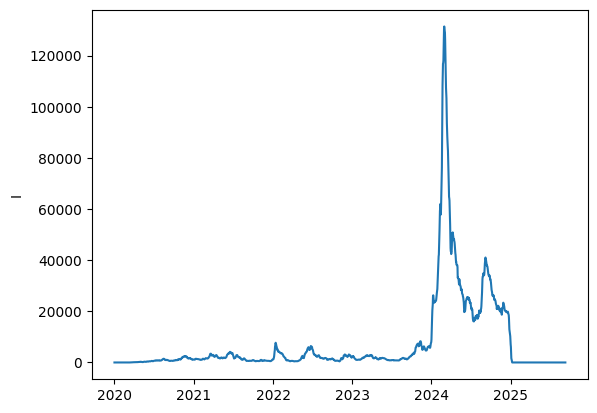

In [9]:
sns.lineplot(data=sir["I"])
plt.show()

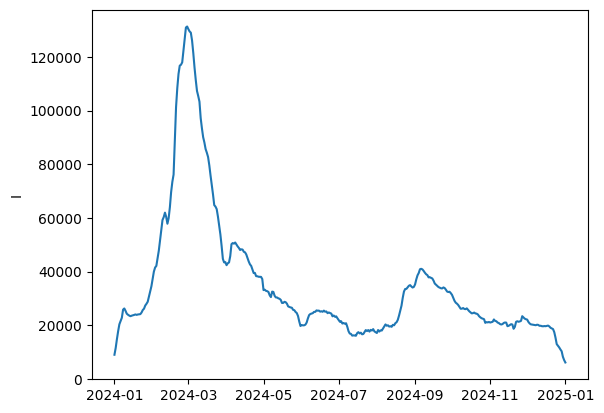

In [10]:
sns.lineplot(data=sir["I"]["2024-01-01":"2025-01-01"])
plt.show()

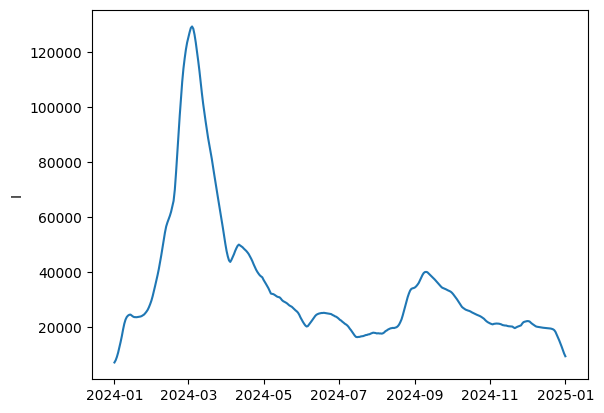

In [11]:
smoothed_sir = sir.rolling(window=7).mean() 
sns.lineplot(data=smoothed_sir["I"]["2024-01-01":"2025-01-01"])
plt.show()

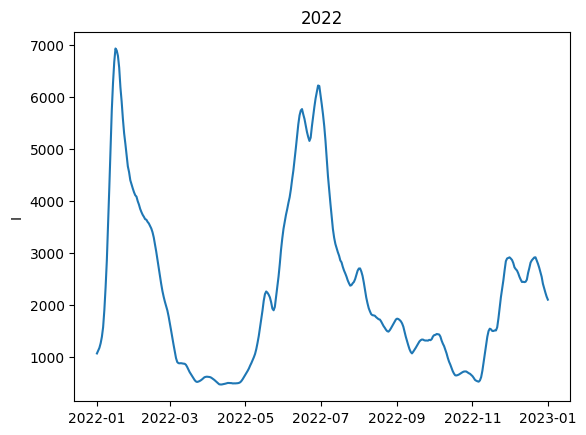

In [12]:
smoothed_sir = sir.rolling(window=7).mean() 
sns.lineplot(data=smoothed_sir["I"]["2022-01-01":"2023-01-01"])
plt.title("2022")
plt.show()

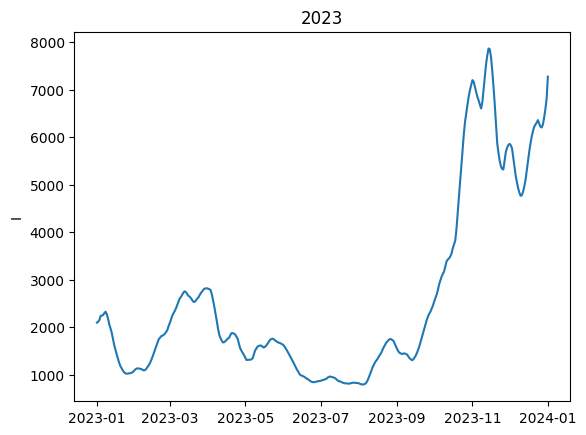

In [13]:
sns.lineplot(data=smoothed_sir["I"]["2023-01-01":"2024-01-01"])
plt.title("2023")
plt.show()

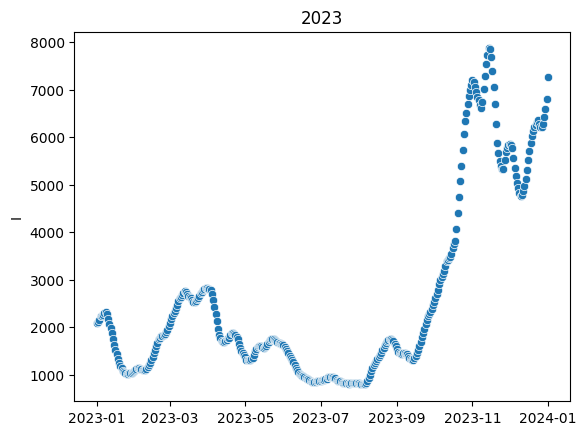

In [14]:
sns.scatterplot(data=smoothed_sir["I"]["2023-01-01":"2024-01-01"])
plt.title("2023")
plt.show()